# Human Activity Recognition


### Objective: To predict an activity on a given new datapoint.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/shrikant/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shrikant/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# import features form features.txt
features = list()
with open('Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()] 
print('No of features:', len(features))
    

No of features: 561


In [4]:
# train data
X_train = pd.read_csv('Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

/home/shrikant/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2188,0.310363,-0.027096,-0.095493,-0.093091,0.344279,-0.367636,-0.100654,0.269812,-0.339362,0.192156,...,-0.624767,-0.761726,-0.738928,-0.571658,-0.796204,0.22551,-0.044425,11,3,WALKING_DOWNSTAIRS


In [5]:
train.shape

(7352, 564)

In [7]:
# get the test data
X_test = pd.read_csv('Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

/home/shrikant/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2863,0.267633,-0.026983,-0.128891,-0.4719,-0.08505,-0.268616,-0.471925,-0.149187,-0.25041,-0.502901,...,0.044461,0.049842,-0.387728,0.23391,-0.824149,0.169584,0.120673,24,1,WALKING


In [8]:
test.shape

(2947, 564)

In [9]:
# Check for duplicates
print('No of duplicates in train:', sum(train.duplicated()))
print('No of duplicates in test :', sum(test.duplicated()))

No of duplicates in train: 0
No of duplicates in test : 0


In [12]:
# Check null values
print('No of NaN/Null values in train:', train.isnull().values.sum())
print('No of NaN/Null values in test:', test.isnull().values.sum())

No of NaN/Null values in train: 0
No of NaN/Null values in test: 0


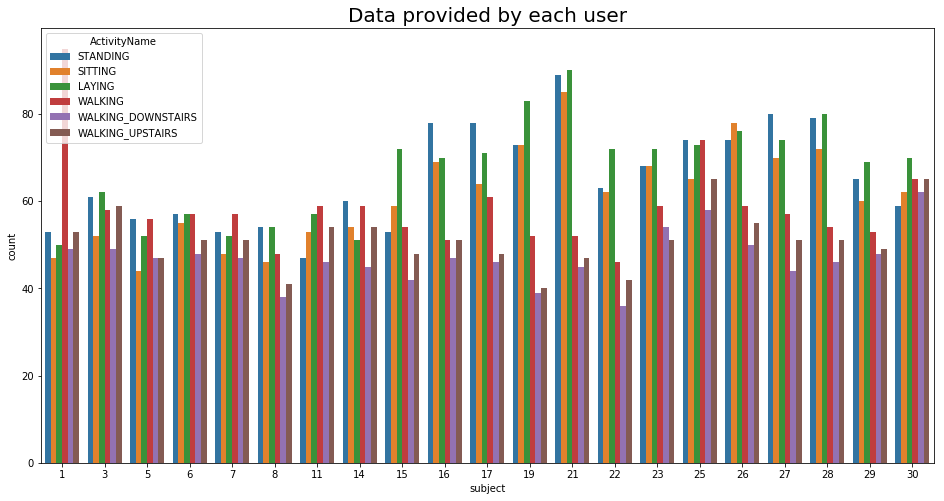

In [13]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

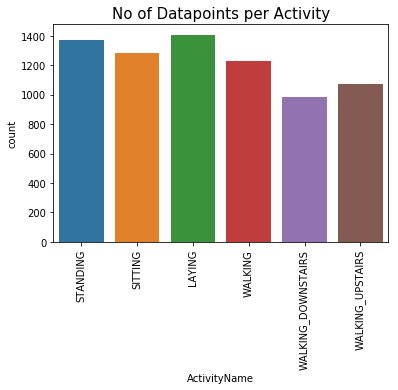

In [14]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

In [15]:
# Changing features name
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

In [16]:
train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [17]:
# Saving files
train.to_csv('Dataset/csv_files/train.csv', index=False)
test.to_csv('Dataset/csv_files/test.csv', index=False)

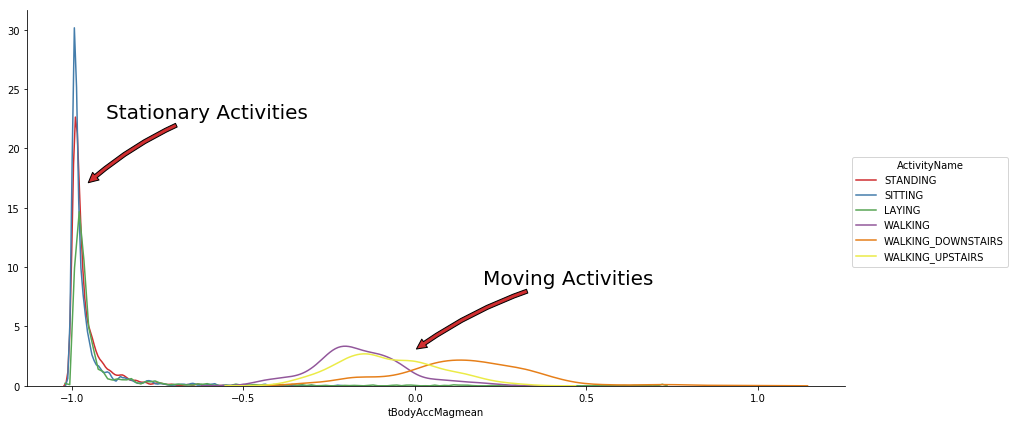

In [18]:
# Visulising activities
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

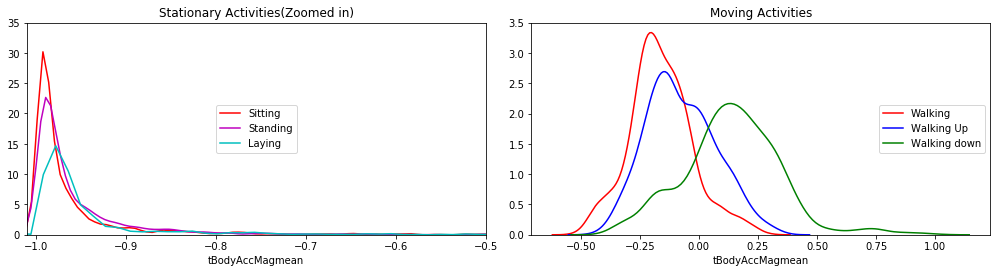

In [19]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

In [20]:
# Get new dataset
train = pd.read_csv('Dataset/csv_files/train.csv')
test = pd.read_csv('Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [21]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [22]:
# X_train and y_train 
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [23]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [24]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [27]:
# Creating labels
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [38]:
# Function for model
def perform_model(model, X_train, y_train, X_test, y_test, class_labels):
    
    
    # to store results at various phases
    results = dict()
    
    # predict test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('\nAccuracy :\n',accuracy )
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    
    print('\nConfusion Matrix :')
    print('\n {}'.format(cm))
    
    # get classification report
    print('\nClassifiction Report :\n')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    

# 1. Logistic Regression with Grid Search

In [39]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [40]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.1min finished



Accuracy :
 0.9630132337970818

Confusion Matrix :

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]

Classifiction Report :

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



#  2. Linear SVC with GridSearch

In [41]:
from sklearn.svm import LinearSVC

In [42]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   49.3s finished



Accuracy :
 0.9670851713607058

Confusion Matrix :

 [[537   0   0   0   0   0]
 [  2 429  57   0   0   3]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]

Classifiction Report :

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

       avg / total       0.97      0.97      0.97      2947



# 3.  Kernel SVM with GridSearch

In [43]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16], 'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)


Accuracy :
 0.9626739056667798

Confusion Matrix :

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]

Classifiction Report :

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

       avg / total       0.96      0.96      0.96      2947



# 4. Decision Trees with GridSearchCV

In [45]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)


Accuracy :
 0.8639294197488971

Confusion Matrix :

 [[537   0   0   0   0   0]
 [  0 385 106   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 470  18   8]
 [  0   0   0  13 346  61]
 [  0   0   0  68  34 369]]

Classifiction Report :

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.78      0.79       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.85      0.95      0.90       496
WALKING_DOWNSTAIRS       0.87      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

       avg / total       0.86      0.86      0.86      2947



# 5. Random Forest Classifier with GridSearch

In [47]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)


Accuracy :
 0.9104173736002714

Confusion Matrix :

 [[537   0   0   0   0   0]
 [  0 431  60   0   0   0]
 [  0  73 459   0   0   0]
 [  0   0   0 486   9   1]
 [  0   0   0  32 343  45]
 [  0   0   0  38   6 427]]

Classifiction Report :

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.88      0.87       491
          STANDING       0.88      0.86      0.87       532
           WALKING       0.87      0.98      0.92       496
WALKING_DOWNSTAIRS       0.96      0.82      0.88       420
  WALKING_UPSTAIRS       0.90      0.91      0.90       471

       avg / total       0.91      0.91      0.91      2947



# 6. Comparing all models

In [48]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.3%       3.699%
Linear SVC          : 96.71%       3.291% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.39%      13.61% 
Random Forest       : 91.04%      8.958% 


# Improving Our model

##   Get the misclassified data

In [49]:
print('Logistic Regression Accuracy : {:,.03}%'.format(log_reg_grid_results['accuracy']*100))

log_reg_pred = log_reg_grid_results['predicted']
print('\nOur model has {}(ie.,{:,.04}%) misclassified points.'.format(sum(log_reg_pred != y_test),\
                                                                  (100-log_reg_grid_results['accuracy']*100)))

bool_misclsfd = log_reg_pred != y_test
mssclfd = test.loc[bool_misclsfd]
print('\n \nSome rows of misclassified points :')

mssclfd.head(3)

Logistic Regression Accuracy : 96.3%

Our model has 109(ie.,3.699%) misclassified points.

 
Some rows of misclassified points :


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
42,0.275747,-0.015388,-0.105058,-0.995814,-0.982480,-0.981914,-0.996652,-0.981452,-0.983212,-0.936969,...,0.133793,-0.179480,0.788973,-0.382063,-0.812523,0.164482,-0.098614,2,4,SITTING
43,0.280283,-0.019175,-0.109322,-0.995313,-0.975241,-0.978922,-0.996139,-0.973738,-0.977447,-0.936969,...,-0.313156,-0.225686,-0.412973,0.577609,-0.812244,0.163983,-0.099165,2,4,SITTING
182,0.231575,0.029387,-0.055042,-0.974816,-0.926952,-0.943930,-0.975645,-0.923428,-0.939722,-0.941363,...,0.097997,-0.171011,-0.113008,-0.602747,-0.703663,0.111204,-0.196333,2,4,SITTING


In [50]:
bool_sit_stand = (test['ActivityName']=='SITTING') | (test['ActivityName']=='STANDING')
df_sit_stand = test.loc[bool_sit_stand]

print(df_sit_stand.ActivityName.value_counts())
df_sit_stand.head(3)

STANDING    532
SITTING     491
Name: ActivityName, dtype: int64


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING


## Analysing test data with t-sne

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

/home/shrikant/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [55]:
# convert 561 feature vector to 2D vector using t-sne
X_test_red = TSNE(n_components=2, perplexity=50).fit_transform(X_test)

# create a dataframe for the reduced test data with y_labels. It will be useful for plotiing with seaborn
df_tsne = pd.DataFrame({'x':X_test_red[:,0], 'y':X_test_red[:,1], 'label':y_test})
print(df_tsne.shape)
df_tsne.head(3)

(2947, 3)


,label,x,y
0,STANDING,-29.300230,12.428917
1,STANDING,-38.334244,5.757350
2,STANDING,-63.597130,0.614726


In [56]:
df_tsne['label'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: label, dtype: int64

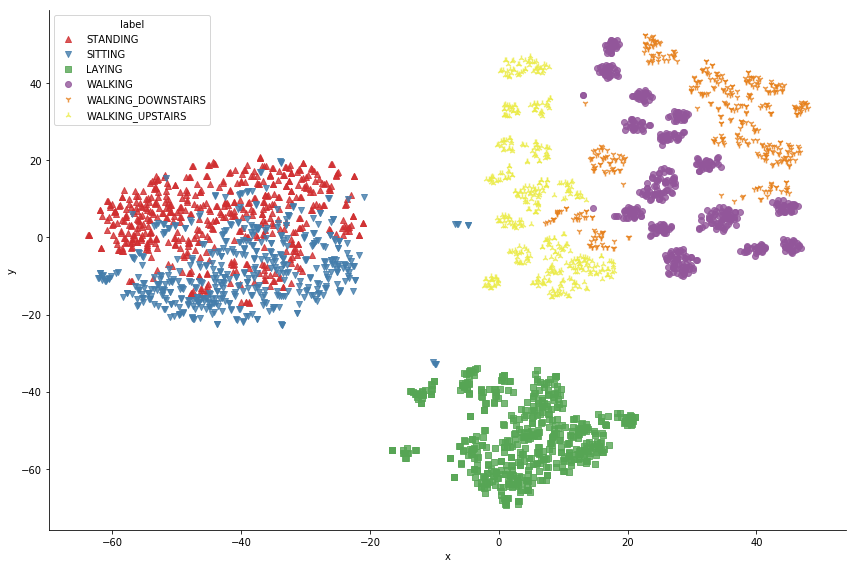

In [57]:
# Plot the reduced tsne values
sns.lmplot(x='x', y='y', data=df_tsne, hue='label', fit_reg=False, size=8, aspect=1.5 \
          ,markers=['^','v','s','o', '1','2'], legend_out=False)


plt.show()

In [58]:
counts = test.ActivityName.value_counts()
print(counts)

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: ActivityName, dtype: int64


In [59]:
# misclassified points of sitting and standing
df_tsne_sit_stand_misclsfd = df_tsne.loc[bool_misclsfd].loc[bool_sit_stand]

# misclassified standing Activities
df_tsne_stand_misclsfd = df_tsne_sit_stand_misclsfd[df_tsne_sit_stand_misclsfd['label'] == 'STANDING']

# misclassified siting Activties
df_tsne_sit_misclsfd = df_tsne_sit_stand_misclsfd[df_tsne_sit_stand_misclsfd['label'] == 'SITTING']

print("Total misclassified points (sitting and standing) : {}".format(df_tsne_sit_stand_misclsfd.shape[0]))

print("\n\t Misclassified Standing : {} ({:,.02f}% of total STANDING values)"\
      .format( df_tsne_stand_misclsfd.shape[0], df_tsne_stand_misclsfd.shape[0]/counts['STANDING'] * 100 ))

print('\n\t Misclassified Sitting  : {} ({:,.02f}% of total SITTING values)'\
      .format(df_tsne_sit_misclsfd.shape[0], df_tsne_sit_misclsfd.shape[0]/counts['SITTING']*100))

Total misclassified points (sitting and standing) : 75

	 Misclassified Standing : 12 (2.26% of total STANDING values)

	 Misclassified Sitting  : 63 (12.83% of total SITTING values)


## Separating SITTING and STANDING

In [71]:
X_train['newJerkMag'] = X_train['tBodyGyroJerkMagsma'] * X_train['tBodyGyroarCoeffY1']
X_test['newJerkMag'] = X_test['tBodyGyroJerkMagsma'] * X_test['tBodyGyroarCoeffY1']

# no of dimensions increased from 561 t0 562
X_train.shape, X_test.shape

((7352, 562), (2947, 562))

In [72]:
log_reg_grid_results.keys()

dict_keys(['predicted', 'accuracy', 'confusion_matrix', 'classification_report', 'model'])

In [73]:
log_reg_grid_results['model'].best_params_

{'C': 30, 'penalty': 'l2'}

##  Logistic Regression on the new data

In [74]:
# Logistic Regression with with this newly added feature
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}

new_log_reg = linear_model.LogisticRegression()
new_log_reg_grid = GridSearchCV(new_log_reg, param_grid=parameters, verbose=1, n_jobs=-1)
new_log_reg_grid_results = perform_model(new_log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.6min finished



Accuracy :
 0.9630132337970818

Confusion Matrix :

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]

Classifiction Report :

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



##  Linear svm with LinearSVC


In [75]:
# perform LinearSVC to the newly added data

new_lr_svc = LinearSVC(C=4)
new_lr_svc_results = perform_model(new_lr_svc, X_train, y_train, X_test, y_test, class_labels=labels,)


Accuracy :
 0.9684424838819138

Confusion Matrix :

 [[537   0   0   0   0   0]
 [  2 438  48   0   0   3]
 [  0  18 514   0   0   0]
 [  0   0   0 495   0   1]
 [  0   0   0   2 413   5]
 [  0   0   0  13   1 457]]

Classifiction Report :

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.89      0.93       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.97      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.98       471

       avg / total       0.97      0.97      0.97      2947



In [78]:
print('{:.04}%'.format(new_lr_svc_results['accuracy'] * 100))

96.84%


# Conclusion :

* 561 features can be reduced to a set of 37 features with simple featuring engineering from domain knowledge. 


* Logistic Regression and Linear SVC are better classifiers in classifying the Activities (96% accuracy).


* Performance is further increased to 97% using joint features.